<a href="https://colab.research.google.com/github/HarshalPawar88/Evaluation-Projects/blob/main/Baseball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement:
### This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

### -- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

### -- Output: Number of predicted wins (W)

### To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics



In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [28]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [29]:
df.head(2)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86


## The column names are not understandable. Which is why we will rename them accordingly from the source of the data.

In [30]:
#renaming the columns
cols={'W':'win', 'R':'runs_scored', 'AB' : 'at_bat' , 'H' : 'hit', '2B' : 'double', '3B':'triple',\
 'HR':'home_runs','BB':'base_on_balls', 'SO': 'strike_out','SB':'stolen_base','RA':'run_average','ER':'earned_runs','CG':'complete_game','SHO':'shoutout','SV':'save','E':'errors','ERA':'earned_runs_average'}
 
df.rename(cols,axis=1,inplace=True)

In [31]:
df.shape

(30, 17)

In [32]:
df.head(2)

,win,runs_scored,at_bat,hit,double,triple,home_runs,base_on_balls,strike_out,stolen_base,run_average,earned_runs,earned_runs_average,complete_game,shoutout,save,errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86


# **1. Primary Inspection**

In [33]:
df.describe()

,win,runs_scored,at_bat,hit,double,triple,home_runs,base_on_balls,strike_out,stolen_base,run_average,earned_runs,earned_runs_average,complete_game,shoutout,save,errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


## Observations: 
## 1. All the columns are numerical.
## 2. None of the fetaures have a very high difference between the mean and the median values.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   win                  30 non-null     int64  
 1   runs_scored          30 non-null     int64  
 2   at_bat               30 non-null     int64  
 3   hit                  30 non-null     int64  
 4   double               30 non-null     int64  
 5   triple               30 non-null     int64  
 6   home_runs            30 non-null     int64  
 7   base_on_balls        30 non-null     int64  
 8   strike_out           30 non-null     int64  
 9   stolen_base          30 non-null     int64  
 10  run_average          30 non-null     int64  
 11  earned_runs          30 non-null     int64  
 12  earned_runs_average  30 non-null     float64
 13  complete_game        30 non-null     int64  
 14  shoutout             30 non-null     int64  
 15  save                 30 non-null     int64

## Observation:
## 1. None of the columns have missing and string values.

# **2. Exploratory Data Analysis**

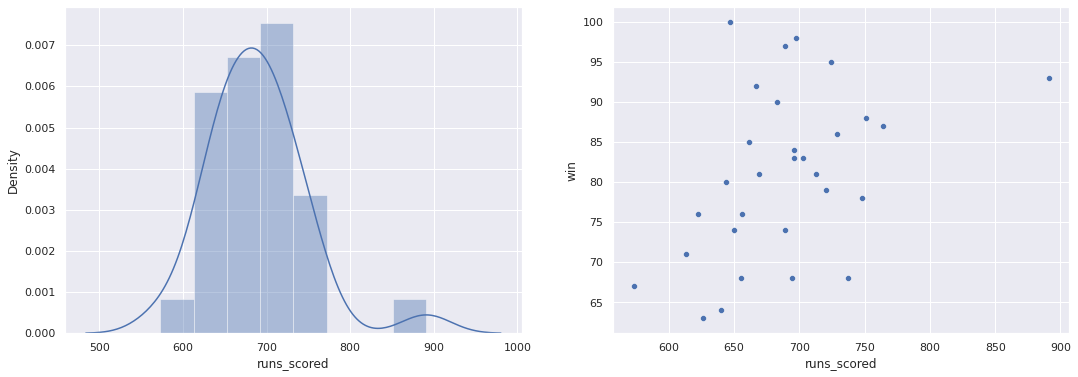

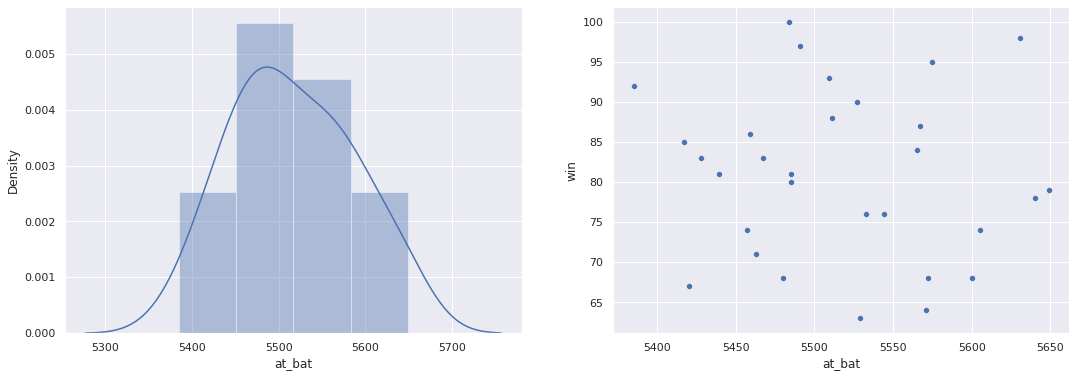

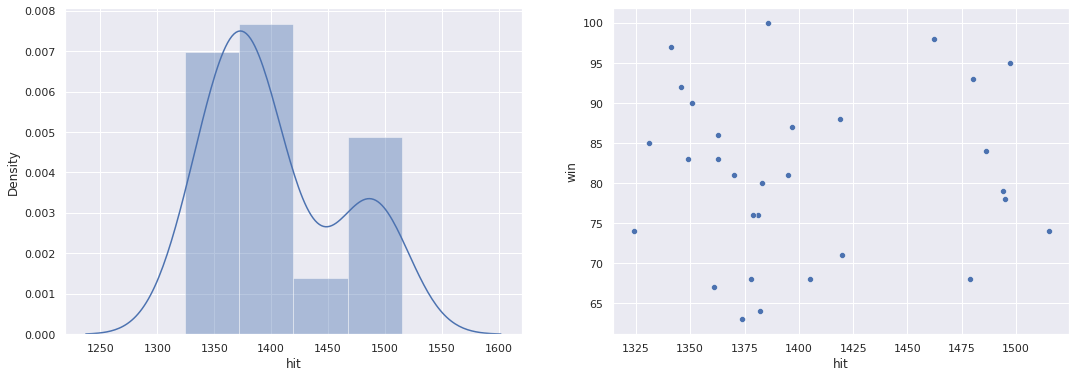

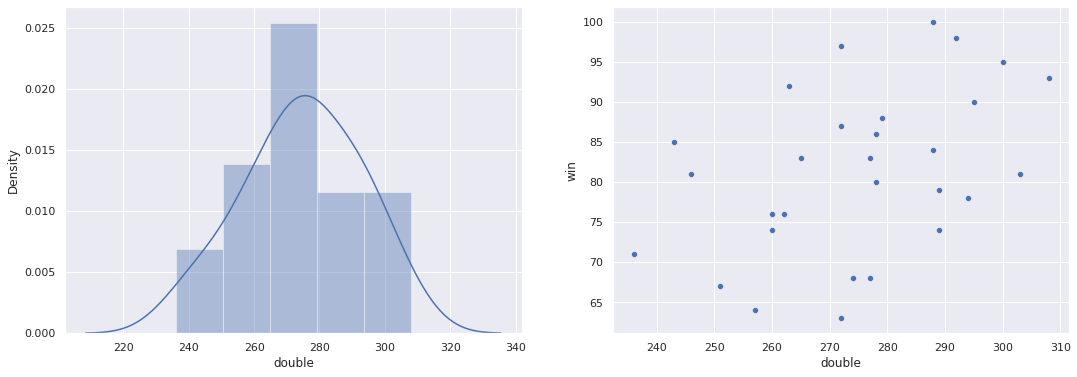

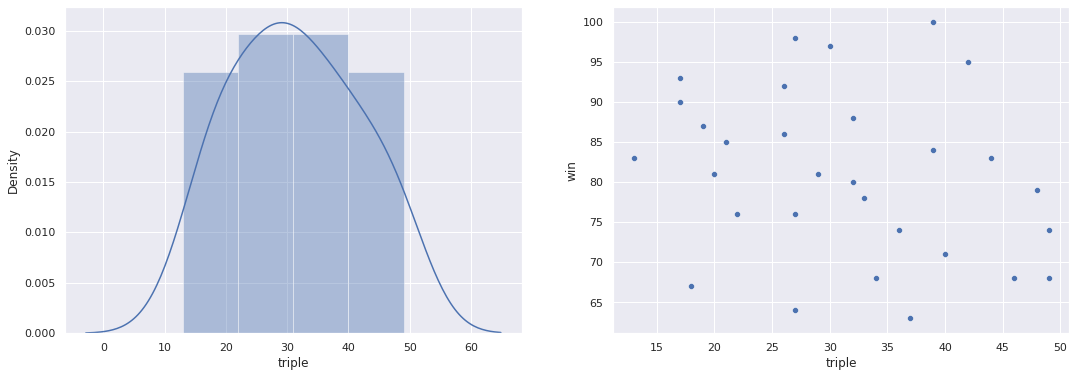

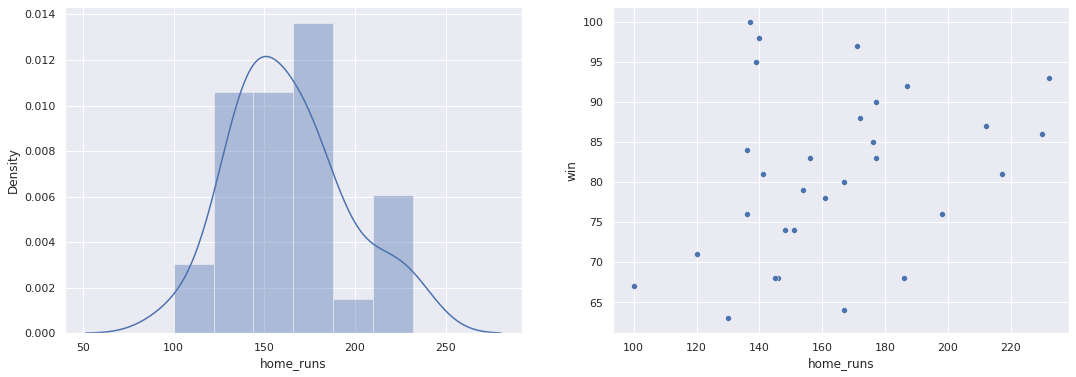

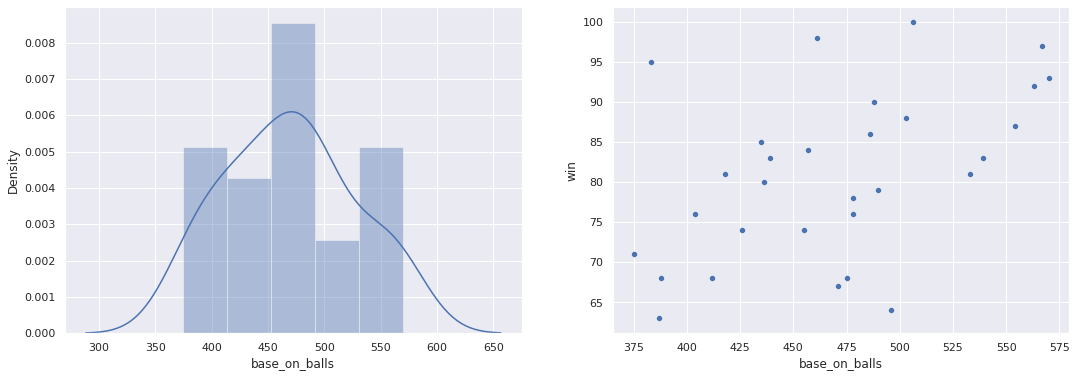

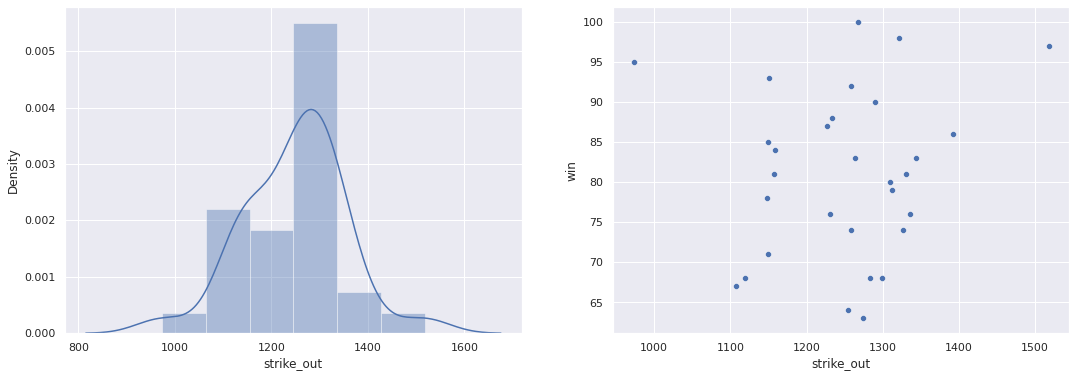

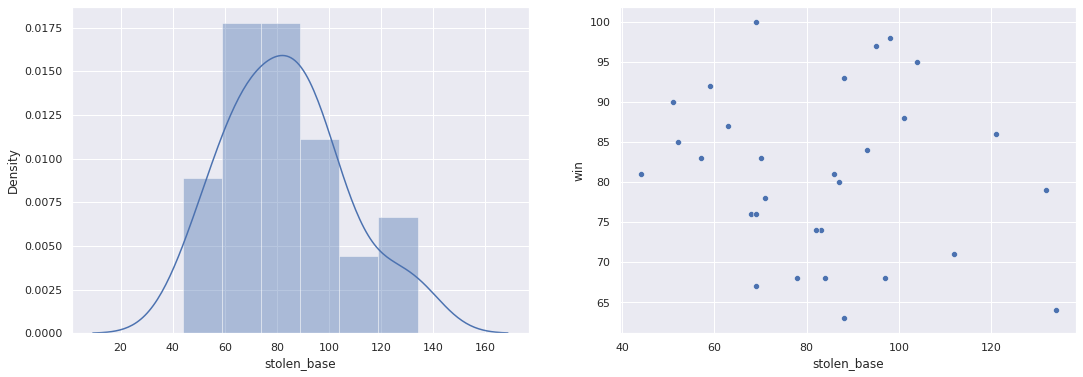

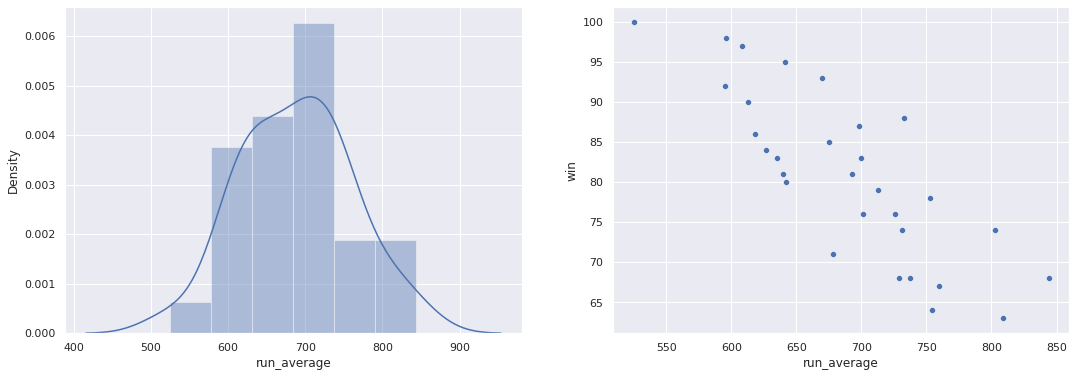

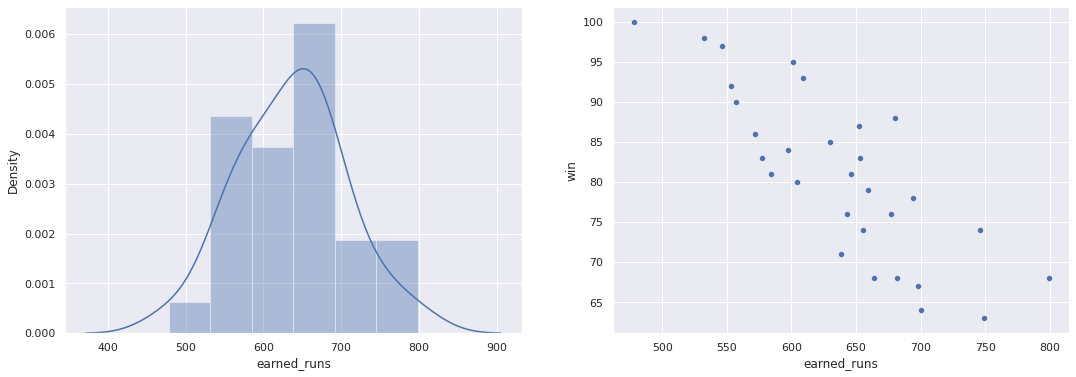

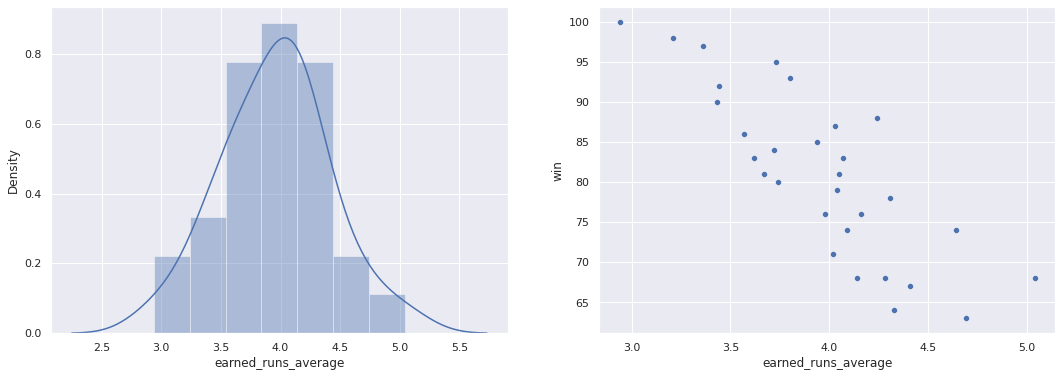

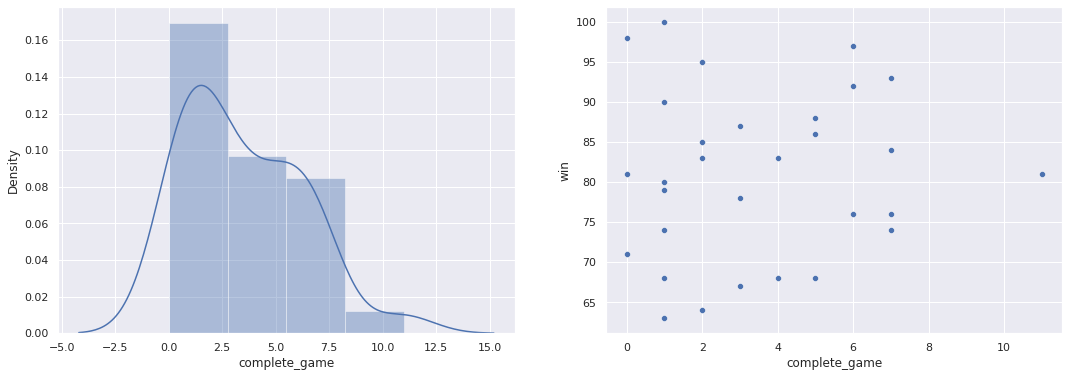

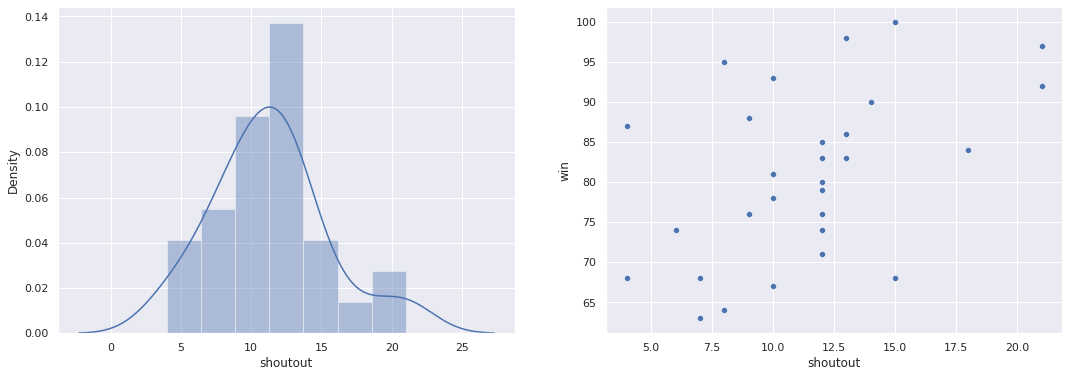

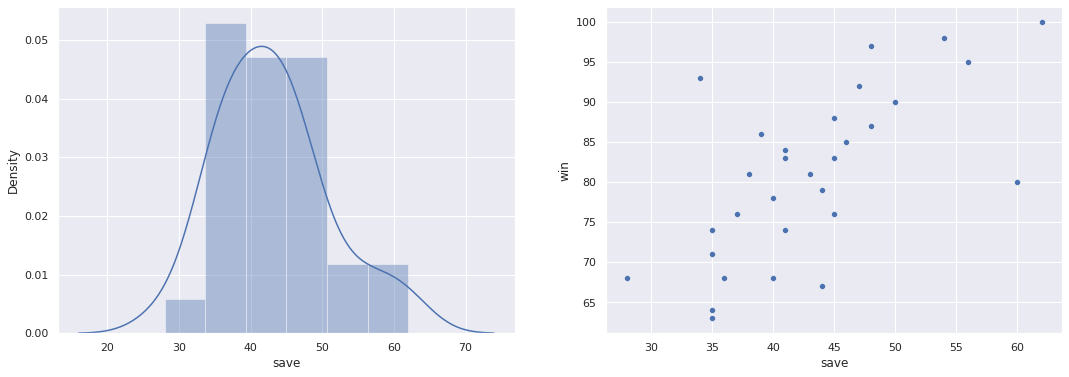

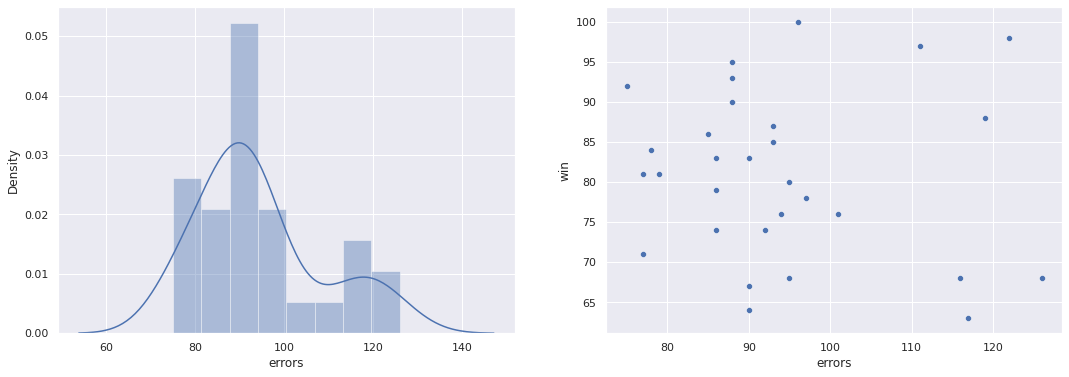

In [35]:
for i in df.drop(columns='win').columns:
  fig, axes = plt.subplots(1, 2, figsize=(18,6))
  sns.distplot(df[i],ax=axes[0])
  sns.scatterplot(ax=axes[1],x=df[i],y=df['win'])
  sns.set(font_scale=1)
  plt.show()

## Observations:
## 1. All the columns are almost normally distributed.
## 2. There are few columns like 'stolen_base', 'hit' that do not graphically show any linear relation with the Output Variable.


## Therefore let us check the correlation.

In [36]:
correlation=df.corr()
correlation

,win,runs_scored,at_bat,hit,double,triple,home_runs,base_on_balls,strike_out,stolen_base,run_average,earned_runs,earned_runs_average,complete_game,shoutout,save,errors
win,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
runs_scored,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
at_bat,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
hit,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
double,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
triple,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
home_runs,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
base_on_balls,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
strike_out,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
stolen_base,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


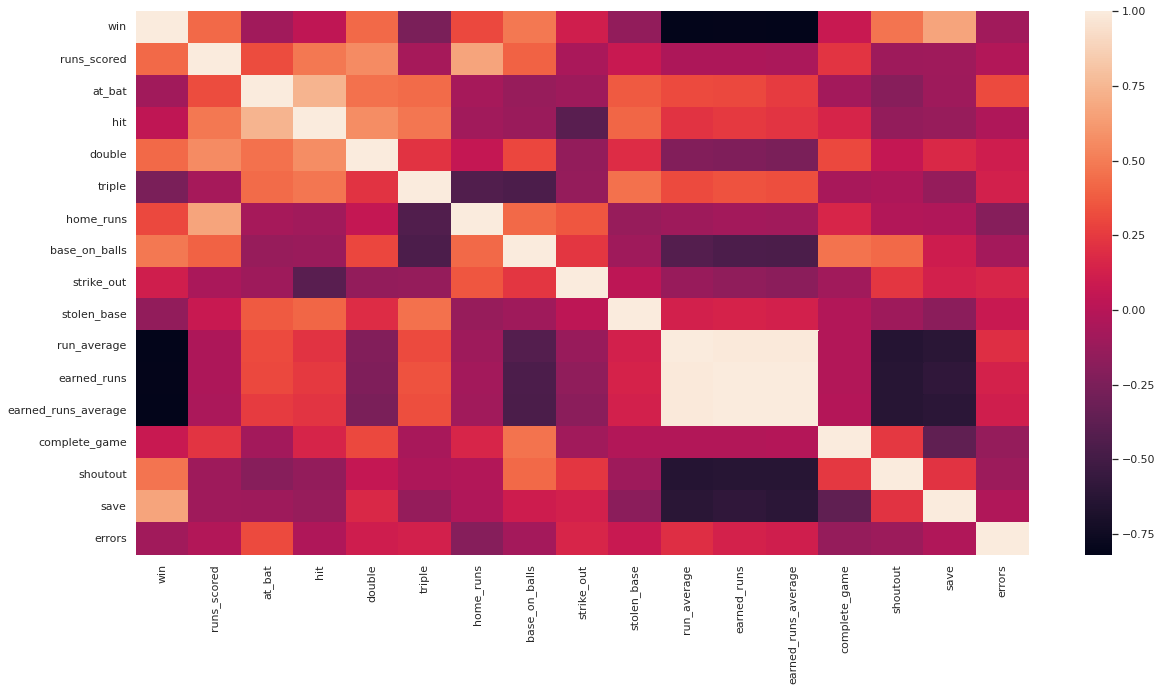

In [37]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr())

## Observations: 
## 1. It is clear from this that there are columns that have very less correlation with the output variable.
## 2. Multicollinearity exists.


# **3. Feature Engineering**

## We will filter out the columns having correlation less than 0.35 and more than -0.35 with the feature 'win'

---



In [38]:
#filtering and then checking for multicollinearity
red_corrrelation=df[list(correlation[(correlation['win']>0.35) | (correlation['win']<-0.35)].index)]
red_corrrelation.corr()

,win,runs_scored,double,base_on_balls,run_average,earned_runs,earned_runs_average,shoutout,save
win,1.000000,0.430751,0.427797,0.484342,-0.812952,-0.809435,-0.819600,0.471805,0.666530
runs_scored,0.430751,1.000000,0.560084,0.402452,-0.041623,-0.041245,-0.049281,-0.103274,-0.096380
double,0.427797,0.560084,1.000000,0.302700,-0.218160,-0.235531,-0.254854,0.057998,0.171576
base_on_balls,0.484342,0.402452,0.302700,1.000000,-0.416445,-0.452663,-0.459832,0.426004,0.099445
run_average,-0.812952,-0.041623,-0.218160,-0.416445,1.000000,0.991018,0.986674,-0.636862,-0.616224
earned_runs,-0.809435,-0.041245,-0.235531,-0.452663,0.991018,1.000000,0.997248,-0.630192,-0.589663
earned_runs_average,-0.819600,-0.049281,-0.254854,-0.459832,0.986674,0.997248,1.000000,-0.630833,-0.607005
shoutout,0.471805,-0.103274,0.057998,0.426004,-0.636862,-0.630192,-0.630833,1.000000,0.221639
save,0.666530,-0.096380,0.171576,0.099445,-0.616224,-0.589663,-0.607005,0.221639,1.000000


## Observations: 
## 1. Four columns ['run_average','earned_runs','shoutout','earned_runs_average'] are highly multicollinear.


# Hence we will keep only the feature that has higher correlation with the output variable i.e 'earned_runs_average'.

In [39]:
#dropping the multicollinear features.
red_corrrelation_1=red_corrrelation.drop(columns=['run_average','earned_runs','shoutout'])
red_corrrelation_1.columns

Index(['win', 'runs_scored', 'double', 'base_on_balls', 'earned_runs_average',
       'save'],
      dtype='object')

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import svm

In [41]:
# Seperating the Independent and Dependent Variables
# X=red_corrrelation_1.drop(columns='win')
# y=red_corrrelation_1['win']
X=red_corrrelation_1.drop(columns='win')
y=red_corrrelation_1['win']

# Removing outliers

In [42]:
# for i in X.columns:
#   X.loc[X[i]>X[i].quantile(0.90),i]=X[i].quantile(0.90)
#   X.loc[X[i]<X[i].quantile(0.10),i]=X[i].quantile(0.10)

## **Note: Tried using the data after removing the outliers. This resulted giving bad scores.**
## Conclusion:
## 1. Removing data in such a small dataset carries the risk of loosing on some important information.

# **4. Data Pre-Processing**

In [43]:
train_score=0
test_score=0
for i in range(0,10000):  
  #splitting
  X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.30,random_state=i)
  #scaling
  #scaler=MinMaxScaler()
  scaler=StandardScaler()
  scaler.fit(X_train)
  X_train=scaler.transform(X_train)
  X_test=scaler.transform(X_test)
  #linear regression
  lr=LinearRegression()
  lr.fit(X_train,y_train)
  #predicting the values using the model
  y_train_pred=lr.predict(X_train)
  y_test_pred=lr.predict(X_test)
  # r2 on train set
  train=r2_score(y_train,y_train_pred)  
  # r2 on test set
  test=r2_score(y_test,y_test_pred)
  if (train_score<train) and (test_score<test):
    train_score=train
    test_score=test
    random=i
    r2_train=train
    r2_test=test
print(random)
print(r2_train)
print(r2_test)


2204
0.9110560230449823
0.8827051898416952


In [49]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.30,random_state=2204)
#scaling
#scaler=MinMaxScaler()
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# **5. Building Models**

### 1. Linear Regression

In [50]:
lr=LinearRegression()
lr.fit(X_train,y_train)
  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
#coefficients
lr.coef_

array([ 5.15207975, -0.22604379, -0.00730616, -5.10694955,  2.57191209])

In [52]:
#predicting the values using the model
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

In [53]:
# r2 on train set
r2_score(y_train,y_train_pred)

0.9110560230449823

In [54]:
# r2 on test set
r2_score(y_test,y_test_pred)

0.8827051898416952

### **Conclusion:** 
### **Although the test results are showing some good results, we will have to check the cross validation score to verify our results and check for overfitting.**

### Checking the cross validation score.

In [62]:
# using the scoring as r2 i.e coefficient of determination
lr_1=LinearRegression()
scores=cross_val_score(lr_1, X_train, y_train,scoring='r2',cv=2)
scores

array([0.65598303, 0.84185689])

In [63]:
#mean of validation score
np.mean(scores)

0.7489199617540959

In [64]:
# standard deviation of validation scores
np.std(scores)

0.09293693131232861

## **Conclusion: We can see some overfitting as the minimum score gives the r2_score of 0.69 and the maximum being 0.84**

## 2. Decision Tree

In [65]:
#import the dt regressor
from sklearn.tree import DecisionTreeRegressor

In [66]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [67]:
#predicting
y_train_pred=dt.predict(X_train)
y_test_pred=dt.predict(X_test)

In [68]:
#r2 for train
r2_score(y_train,y_train_pred)

1.0

In [69]:
# r2 for test
r2_score(y_test,y_test_pred)

0.2268325262982135

## Observation:**There is a lot of overfitting.**

## 3. Grid Search CV with decision Tree.

In [79]:
param={'max_depth':[3,2,4,5,6,7,8,9],'min_samples_split':[1,2,3,4,5], 'min_impurity_split':[1,2,3,4,5],'max_features':[1,2,3,4,5,6]}
dt_1=DecisionTreeRegressor()
dt_gscv=GridSearchCV(dt_1, param_grid=param,cv=2)
dt_gscv.fit(X_train,y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 2, 4, 5, 6, 7, 8, 9],
                         'max_features': [1, 2, 3, 4, 5, 6],
                         'min_

In [80]:
# checking the best parameters
dt_gscv.best_params_

{'max_depth': 7,
 'max_features': 3,
 'min_impurity_split': 3,
 'min_samples_split': 5}

In [81]:
dt_gscv.best_score_

0.653839720366959

### Cross Validation

In [83]:
# using the best parameters for cross validation
dt_2=DecisionTreeRegressor(max_depth=7,max_features=3,min_impurity_split=3,min_samples_split=5)
scores=cross_val_score(dt_2, X_train, y_train,scoring='r2',cv=2)
scores

array([0.72322423, 0.27370114])

In [84]:
np.mean(scores)

0.4984626841526349

In [85]:
np.std(scores)

0.2247615420776034

## **Conclusion: The overfitting still exists.**

## 4. XGBoost

In [86]:
import xgboost as xgb

In [87]:
x_b=xgb.XGBRegressor()
x_b.fit(X_train,y_train)

[05:06:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [88]:
#predicting
y_train_pred=x_b.predict(X_train)
y_test_pred=x_b.predict(X_test)

In [89]:
#train
r2_score(y_train,y_train_pred)

0.9997689717280248

In [90]:
#test
r2_score(y_test,y_test_pred)

0.5645279610064834

## 5. XGboost with Grid Search CV

In [143]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.30,random_state=42)
#scaling
scaler=MinMaxScaler()
#scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
param={'booster':['gblinear','gbtree','dart'],'max_depth':[3,2,4,5,6,7,8,9],'min_child_weight':[1,2,3,4,5],'n_estimators':[100,200,300,400]}
xgb_1=xgb.XGBRegressor()
xgb_gscv=GridSearchCV(xgb_1, param_grid=param,cv=2,scoring='r2')
xgb_gscv.fit(X_train,y_train)

In [152]:
#predicting
y_train_pred=xgb_gscv.predict(X_train)
y_test_pred=xgb_gscv.predict(X_test)

In [153]:
# for train
r2_score(y_train,y_train_pred)

0.9956557036974528

In [154]:
# for test
r2_score(y_test,y_test_pred)

0.5675677995945914

In [148]:
#checking the best parameters
xgb_gscv.best_params_

{'booster': 'gbtree',
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 200}

In [150]:
xgb_2=xgb.XGBRegressor(n_estimators=200,min_child_weight=5,max_depth=3,booster='gbtree')
cross_val_score(xgb_2, X_train, y_train,scoring='r2',cv=3)

[05:12:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:12:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:12:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([0.45970664, 0.27911035, 0.75296384])

## **Conclusion: The model overfits.**

## 6. Support Vector Machine

In [97]:
sv=svm.SVR(kernel='linear')
sv.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [98]:
# predicting 
y_train_pred=sv.predict(X_train)
y_test_pred=sv.predict(X_test)

In [99]:
# r2 for train
r2_score(y_train,y_train_pred)

0.9047433736796521

In [100]:
#r2 for test
r2_score(y_test,y_test_pred)

0.8837740642298244

### Checking the cross validation score

In [101]:
sv=svm.SVR(kernel='linear')
cross_val_score(sv, X_train, y_train,scoring='r2', cv=3)

array([0.57753644, 0.678076  , 0.70526605])

## **Conclusion: We can see some overfitting with one of the folds giving the r_2 score of 0.62 and the maximum being 0.83**

## 7. Grid Search CV on SVM

In [132]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.30,random_state=42)
#scaling
scaler=MinMaxScaler()
#scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [133]:
#grid search cv
param={'kernel':['poly','linear','rbf'],'C':[0.01,0.1,1,10,20,50,100,150,200,250,300,350],'gamma':[0.01,0.1,1,10,0.001,0.0001], 'epsilon':[0.001,0.10,0.05,0.5,1,10,20]}
sv_1=svm.SVR()
gscv=GridSearchCV(sv_1,param_grid=param,cv=3,scoring='r2')
gscv.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 20, 50, 100, 150, 200, 250,
                               300, 350],
                         'epsilon': [0.001, 0.1, 0.05, 0.5, 1, 10, 20],
                         'gamma': [0.01, 0.1, 1, 10, 0.001, 0.0001],
                         'kernel': ['poly', 'linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [134]:
#checking the best parameters
gscv.best_params_

{'C': 150, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'linear'}

In [135]:
#predicting
y_train_pred=gscv.predict(X_train)
y_test_pred=gscv.predict(X_test)

In [136]:
#r2 for train
r2_score(y_train,y_train_pred)

0.9236684589233745

In [137]:
#r2 for test
r2_score(y_test,y_test_pred)

0.8175065801252603

In [140]:
sv=svm.SVR(kernel='linear',C=150, gamma=0.01,epsilon=1)
scores=cross_val_score(sv, X_train, y_train,scoring='r2', cv=3)
scores

array([0.91190907, 0.74088428, 0.88221054])

In [141]:
#mean of validation score
np.mean(scores)

0.8450012969317684

In [142]:
# standard deviation of validation scores
np.std(scores)

0.07461351957885472

## **Conclusion: The mean of validation scores is 83% and the standard deviation is lower than the other models.**

# **Final Conclusion:**
## **After trying all the above models and hyperparameter tuning, Support Vector Machine gave some better results with the mean cross validation r2 score of 83% and the standard deviation of those scores being just 7%. R2 score on test set is 81%.**

# **Saving the Model**

In [ ]:
support_vector_machine=svm.SVR(kernel='linear',C=100, gamma=0.01)
support_vector_machine.fit(X_train, y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
import pickle
 
# Save the trained model as a pickle string.
saved_model = pickle.dumps(support_vector_machine)
 
# Load the pickled model
svm_from_pickle = pickle.loads(saved_model)
 
# Use the loaded pickled model to make predictions
svm_from_pickle.predict(X_test)

array([ 83.04024636, 100.82251309,  66.65221759,  89.96262678,
        89.93461067,  79.88336865,  75.44649067,  63.92079742,
        80.02007142])